In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel("/home/intellect/Documents/Data_Science/Lin/student_grades_dataset_200.xlsx")
df.head()


,Student ID,Name,Subject,Marks,Grade,Attendance %
0,S024,Laura,History,40,D,75
1,S007,Queen,Science,61,C,76
2,S021,Violet,Science,31,D,68
3,S010,Emma,Math,77,B,91
4,S042,Violet,Geography,46,D,70


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Student ID    200 non-null    object
 1   Name          200 non-null    object
 2   Subject       200 non-null    object
 3   Marks         200 non-null    int64 
 4   Grade         200 non-null    object
 5   Attendance %  200 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()


,Marks,Attendance %
count,200.000000,200.000000
mean,63.475000,76.290000
std,21.336485,13.974704
min,31.000000,50.000000
25%,45.000000,65.000000
50%,60.000000,75.000000
75%,85.000000,89.000000
max,100.000000,100.000000


In [5]:
df = df[['Attendance %', 'Marks']]
df.head()


,Attendance %,Marks
0,75,40
1,76,61
2,68,31
3,91,77
4,70,46


In [6]:
df.isnull().sum()


Attendance %    0
Marks           0
dtype: int64

In [7]:
df = df.dropna()


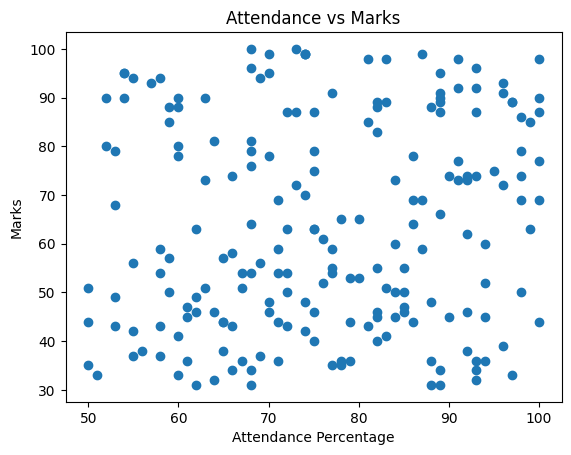

In [8]:
plt.scatter(df['Attendance %'], df['Marks'])
plt.xlabel("Attendance Percentage")
plt.ylabel("Marks")
plt.title("Attendance vs Marks")
plt.show()


In [9]:
X = df[['Attendance %']]   # 2D
y = df['Marks']            # 1D


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)


Slope (m): 0.15371978408824202
Intercept (c): 51.68076742548699


In [14]:
y_pred = model.predict(X_test)



In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 454.9558535823815
RMSE: 21.32969417460976
R² Score: 0.03541437381080048


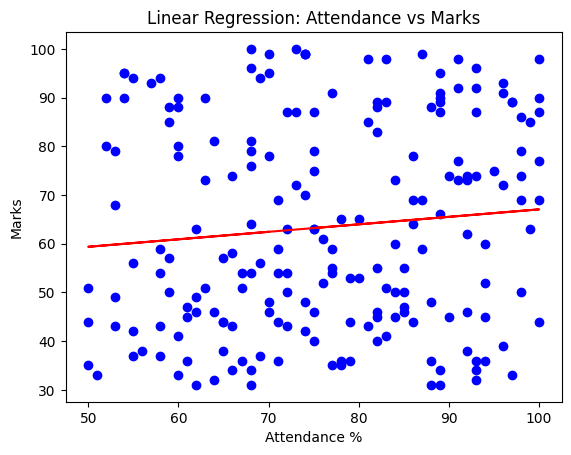

In [16]:
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Attendance %")
plt.ylabel("Marks")
plt.title("Linear Regression: Attendance vs Marks")
plt.show()


In [17]:
attendance = [[85]]
predicted_marks = model.predict(attendance)

print("Predicted Marks:", predicted_marks[0])


Predicted Marks: 64.74694907298756


/home/intellect/Documents/Data_Science/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
